**Q1:**

*A:* In the covariance equation from the numerator we learn the direction of related changes of the variables for it sums the dot products of the difference of every sample from each dataset from it's mean. For example as one variable increases and the other one decreases most of the products that will be summed up will be negative and as a result we'll get a negative covariance. Because the magnitude of the covariance depends on the specific data set and the magnitude of the values in the sample it can't give us a unified measure for all data sets to measure how much the variables are "changing together". This correction comes with the correlation equation where the denominator standartizes the values of the dataset and thus gives us a unified measure for all possible data sets not only for the direction of mutual change but also it's magnitude.

## add the equations of cov and corr here

*B:* 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [47]:
Iris_df = pd.read_csv("iris.csv")
Iris_df.head()
sns.heatmap()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Explore the relationship between the different features using visualization:


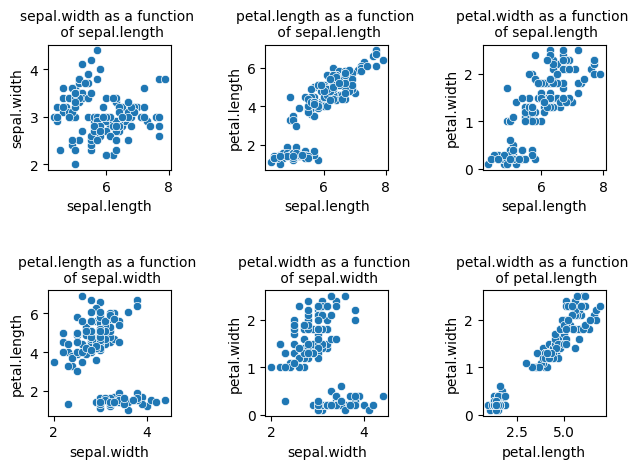

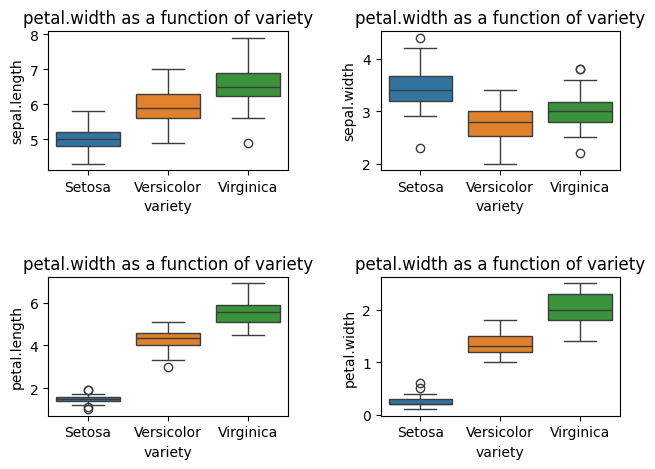

In [ ]:
Iris_df_numbers = Iris_df.select_dtypes(include=['number'])

# wanted to add clustering but didn't have time:
fig, axes = plt.subplots(2,3)
n=0
for i in range(Iris_df_numbers.shape[1]):
    for j in range(i+1,Iris_df_numbers.shape[1]):
        if i != j: 
            x=Iris_df.columns[i]
            y=Iris_df.columns[j]
            ax = axes.ravel()[n]
            ax.set_title(f"{y} as a function \n of {x}", fontsize=10)
            sns.scatterplot(x=x, y=y, data=Iris_df, ax=ax) 
            n+=1

plt.tight_layout(w_pad = 3, h_pad=3)

fig, axes = plt.subplots(2,2)
for i in range(Iris_df_numbers.shape[1]):
    ax = axes.ravel()[i]
    ax.set_title(f"{y} as a function of variety")
    x1 = 'variety'
    y1 = Iris_df.columns[i]
    sns.boxplot(x=x1, y=y1, data=Iris_df, hue=x1, ax = ax)
plt.tight_layout(w_pad = 3, h_pad=3)


*C:*

In [32]:
def calcCov(x, y):
  x = x.to_numpy()
  y = y.to_numpy()
  x_normalized = np.apply_along_axis(lambda x: x - np.mean(x), 0, x)
  y_normalized = np.apply_along_axis(lambda y: y - np.mean(y), 0, y)
  return np.dot(x_normalized.T, y_normalized) / (x.shape[0]-1) # for a covariance from a sample and not population

In [33]:
def covMat(data):
  cov_mat = np.zeros((data.shape[1], data.shape[1]))
  for i in range(data.shape[1]):
    for j in range(data.shape[1]):
      cov_mat[i, j] = calcCov(data.iloc[:, i], data.iloc[:, j])
  return cov_mat

*D: test 1*

In [34]:
print(covMat(Iris_df_numbers))
print(np.cov(Iris_df_numbers, rowvar=False)) # rowvar = False, cause in our dataframe each column represents a variable and not the rows.

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


*E:*

In [35]:
def corrMat(data):
  cov_mat = covMat(data)
  denomenator = np.zeros((data.shape[1], data.shape[1]))
  corr_mat = np.zeros((data.shape[1], data.shape[1]))
  for i in range(data.shape[1]):
    for j in range(data.shape[1]):
      denomenator[i,j] = np.sqrt(data.iloc[:, i].var() * data.iloc[:, j].var())
      corr_mat[i,j] = cov_mat[i,j] / denomenator[i,j]
  return corr_mat

*F: test 2*

In [36]:
print(corrMat(Iris_df_numbers))
print(np.corrcoef(Iris_df_numbers, rowvar=False))

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


*G:*

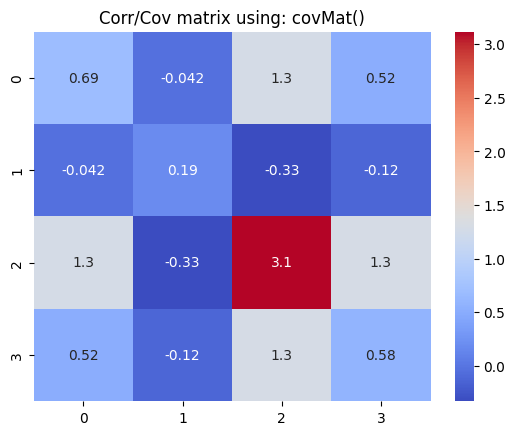

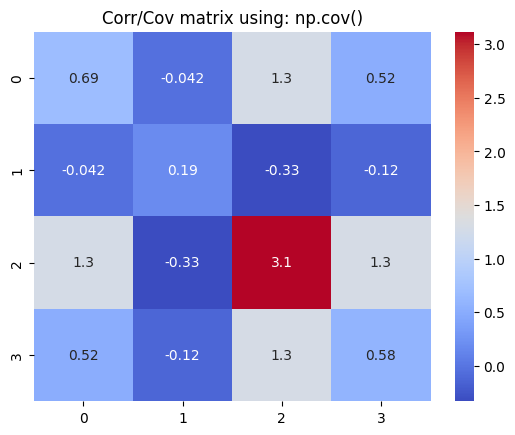

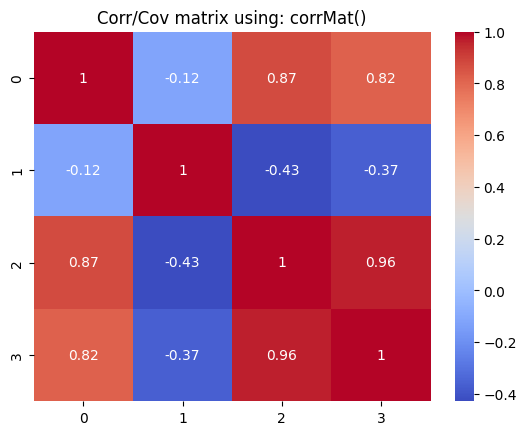

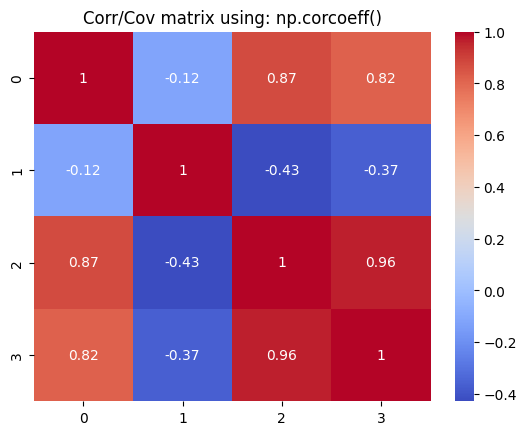

In [55]:
corr_cov_matrices = [covMat(Iris_df_numbers), np.cov(Iris_df_numbers, rowvar=False), corrMat(Iris_df_numbers), np.corrcoef(Iris_df_numbers, rowvar=False)]
methods = ['covMat()','np.cov()','corrMat()','np.corcoeff()']
for i in range(len(corr_cov_matrices)):
    plt.figure()
    plt.title (f"Corr/Cov matrix using: {methods[i]}")
    sns.heatmap(corr_cov_matrices[i],xticklabels=True, yticklabels=True, cmap='coolwarm', annot=True)



**Q2:**

In [4]:
laptop_price_df = pd.read_csv("laptop_price - dataset.csv")
print(laptop_price_df.head())
print(laptop_price_df.shape)

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

Text(0.5, 1.0, 'Distribution and Variation of Laptop Prices Across Companies')

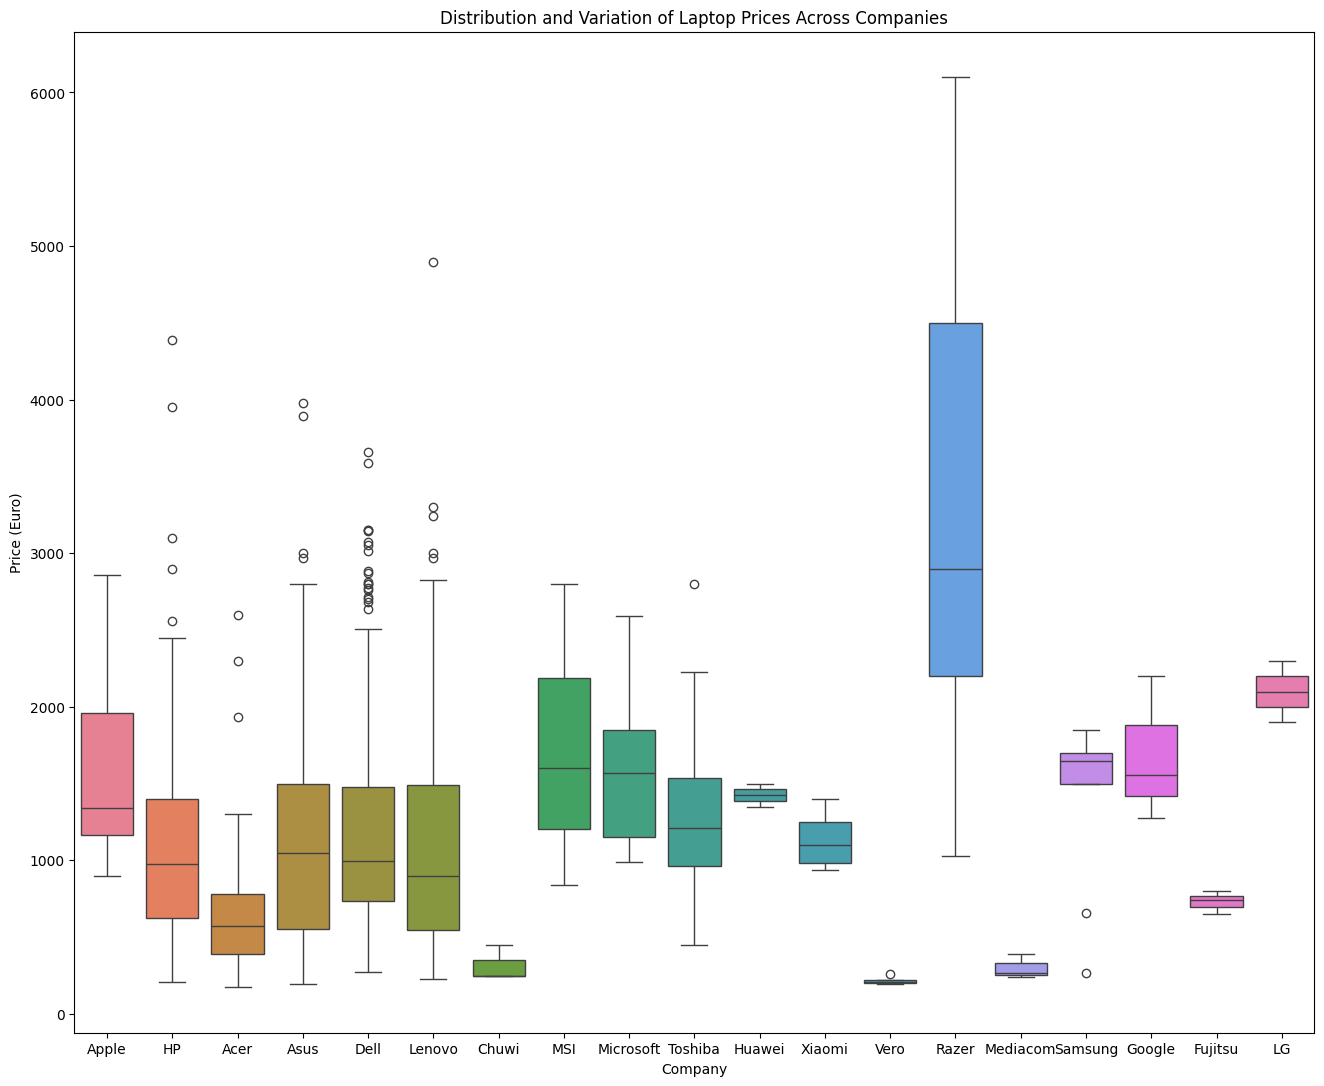

In [46]:
plt.figure(figsize=(16, 13))
sns.boxplot(laptop_price_df, x='Company', y='Price (Euro)', hue="Company")
plt.title("Distribution and Variation of Laptop Prices Across Companies")

In [47]:
laptop_mean_price_df = laptop_price_df[['Price (Euro)','Company']].groupby('Company').mean() #need to chane the title to mean price
laptop_mean_price_df.rename(columns={'Price (Euro)':'Mean Laptop Price (Euro)'}, inplace=True)
print(f"Mean laptop prices: \n {laptop_mean_price_df}")

Mean laptop prices: 
            Mean Laptop Price (Euro)
Company                            
Acer                     633.464455
Apple                   1564.198571
Asus                    1123.829737
Chuwi                    314.296667
Dell                    1199.225120
Fujitsu                  729.000000
Google                  1677.666667
HP                      1080.314664
Huawei                  1424.000000
LG                      2099.000000
Lenovo                  1093.862215
MSI                     1728.908148
Mediacom                 295.000000
Microsoft               1612.308333
Razer                   3346.142857
Samsung                 1413.444444
Toshiba                 1267.812500
Vero                     217.425000
Xiaomi                  1133.462500


In [48]:
laptop_price_company = laptop_price_df[['Company', 'Price (Euro)']]
laptop_price_company_max = laptop_price_company[laptop_price_company['Price (Euro)']==laptop_price_company.groupby('Company').max().max()['Price (Euro)']]
laptop_price_company_max.rename(columns={'Price (Euro)':'Max Laptop Price (Euro)'}, inplace=True)
print(f"Most expensive laptop: \n {laptop_price_company_max}")

Most expensive laptop: 
     Company  Max Laptop Price (Euro)
196   Razer                   6099.0


C:\Users\eliza\AppData\Local\Temp\ipykernel_15520\3698372883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_price_company_max.rename(columns={'Price (Euro)':'Max Laptop Price (Euro)'}, inplace=True)


Find the different types of Operating systems present in the data - under the column 
name "OpSys". 
    Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform. 

In [49]:
print(laptop_price_df["OpSys"].unique())
print(laptop_price_df["OpSys"].dtype) # figured out that initial data type of the column is not string
# and thus why couldn't use string replace
laptop_price_df["OpSys"] = laptop_price_df["OpSys"].astype("string")
print(laptop_price_df["OpSys"].unique())

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
object
<StringArray>
[       'macOS',        'No OS',   'Windows 10',     'Mac OS X',
        'Linux',      'Android', 'Windows 10 S',    'Chrome OS',
    'Windows 7']
Length: 9, dtype: string


In [51]:
laptop_price_df.loc[laptop_price_df['OpSys'].str.contains('windows', case=False), 'OpSys'] = 'Windows'
laptop_price_df.loc[laptop_price_df['OpSys'].str.contains('mac', case=False), 'OpSys'] = 'macOS'
laptop_price_df["OpSys"].unique()


<StringArray>
['macOS', 'No OS', 'Windows', 'Linux', 'Android', 'Chrome OS']
Length: 6, dtype: string

Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems. 

In [81]:
def plot_continuous_per_category(data_frame, continuous_var_label, categorical_var_label):
    # add testing if there is a label to a column that is labeled with continuous var / category:
    df = data_frame[[categorical_var_label, continuous_var_label]]
    df[categorical_var_label] = df[categorical_var_label].astype("string") # conversion to string, cause I'll use string methods.
    for category in  df[categorical_var_label].unique(): 
        x_axis = df.loc[df[categorical_var_label]==category,continuous_var_label]
        plt.figure()
        sns.displot(data=x_axis, kind="hist", bins = 10, aspect = 1.5)
        plt.ylabel("number of laptops")
        plt.title(f"Distribution of {continuous_var_label} for {categorical_var_label} of {category}")
        

C:\Users\eliza\AppData\Local\Temp\ipykernel_15520\281197375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_var_label] = df[categorical_var_label].astype("string") # conversion to string, cause I'll use string methods.


<Figure size 640x480 with 0 Axes>

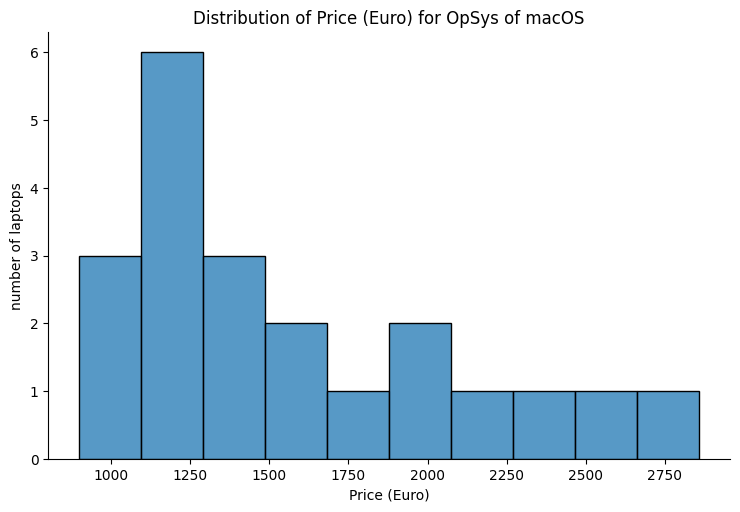

<Figure size 640x480 with 0 Axes>

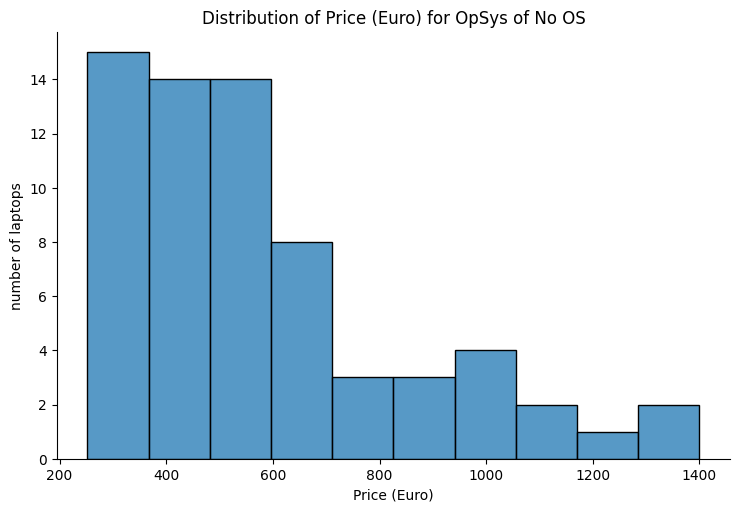

<Figure size 640x480 with 0 Axes>

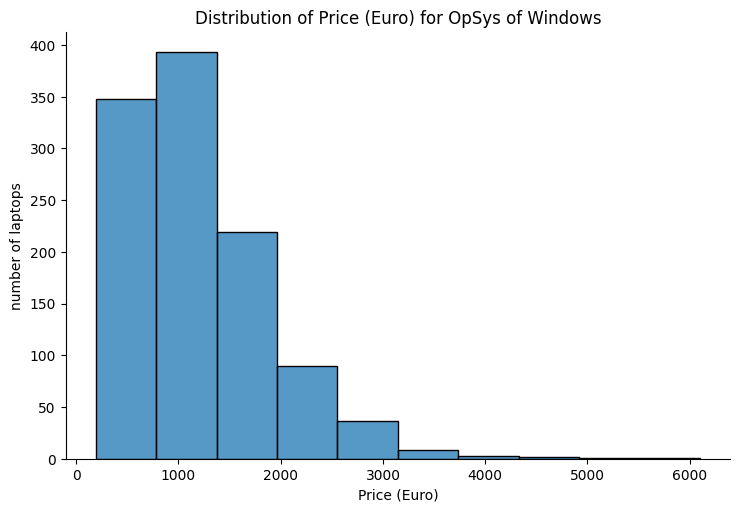

<Figure size 640x480 with 0 Axes>

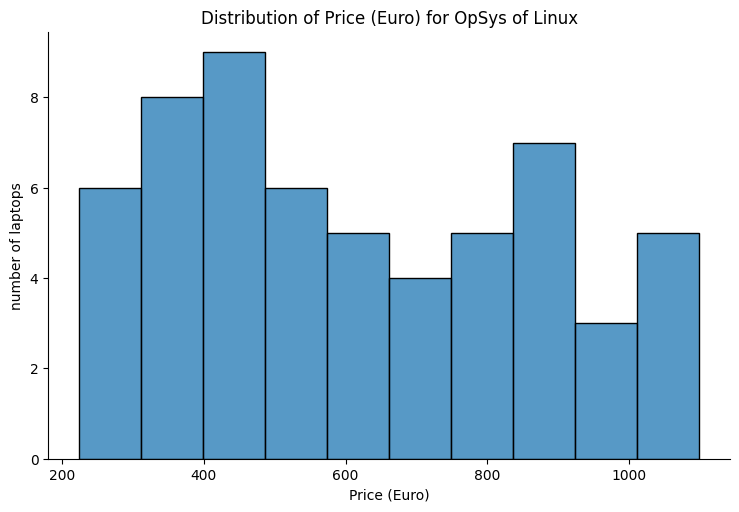

<Figure size 640x480 with 0 Axes>

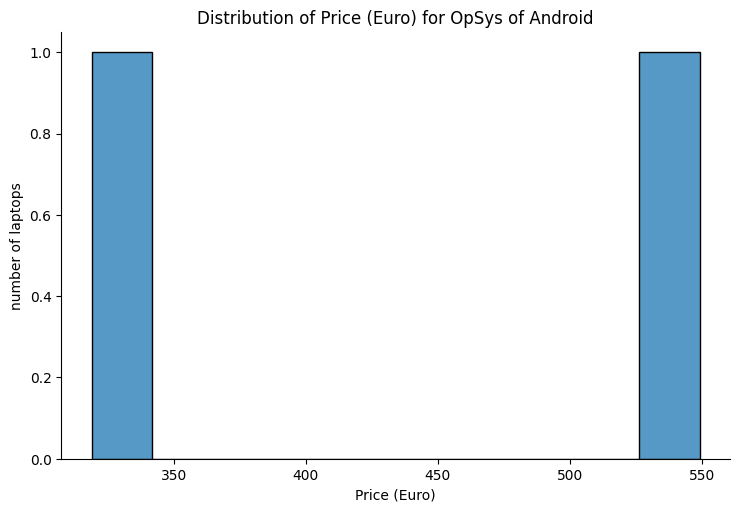

<Figure size 640x480 with 0 Axes>

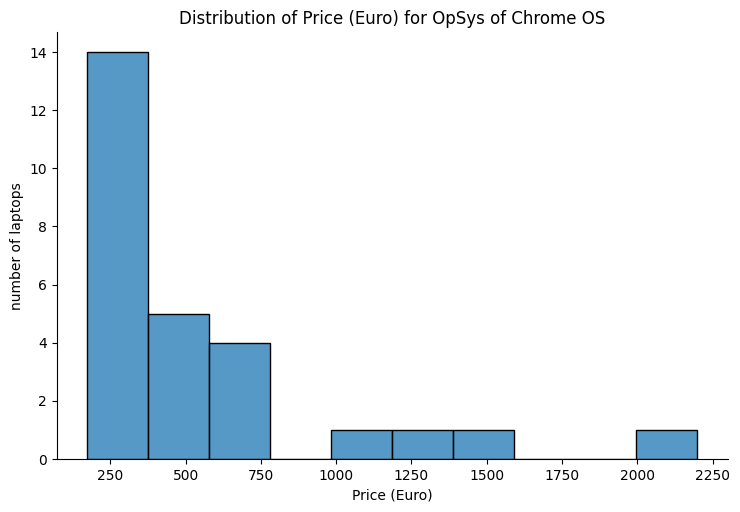

In [82]:
plot_continuous_per_category(laptop_price_df, 'Price (Euro)', 'OpSys') 

What is the relationship between RAM and computer price? add an adequate plot to support your findings. 

Text(0.5, 1.0, 'Distribution and Variation of Laptop Prices Across RAM')

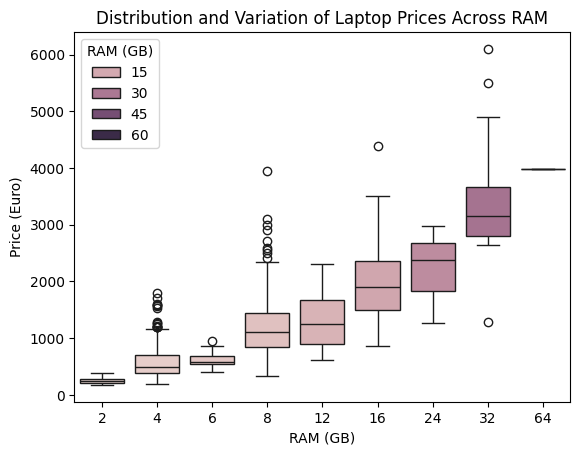

In [11]:
plt.figure()
sns.boxplot(laptop_price_df, x='RAM (GB)', y='Price (Euro)', hue="RAM (GB)")
plt.title("Distribution and Variation of Laptop Prices Across RAM")

We can see very clearly in the plot above that as the RAM get's higher the distribution of laptop prices is also higher.

Create a new column for the dataframe called "Storage type" that extracts the 
storage type from the column "Memory". 
    For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.

In [134]:
laptop_price_df['Memory'] = laptop_price_df['Memory'].astype("string")
removing_things = ['GB', 'TB', '.']
laptop_price_df['Storage Type'] = laptop_price_df['Memory']
for thing in removing_things:
    laptop_price_df['Storage Type'] = laptop_price_df['Storage Type'].str.replace(thing, '')

laptop_price_df['Storage Type'] = laptop_price_df['Storage Type'].apply(lambda x: "".join(y for y in x if not y.isdigit()))

laptop_price_df['Storage Type'].unique()

array([' SSD', ' Flash Storage', ' HDD', ' SSD +   HDD', ' SSD +   SSD',
       ' Hybrid', ' Flash Storage +   HDD', ' HDD +   HDD',
       ' SSD +   Hybrid'], dtype=object)

All plots must be plotted with axes titles and units as well as plot titles. 

Q3 (15pts): Think of additional questions related to this data. What types of analyses and 
visualizations would you use to address them? Select two questions from your list and 
implement. Submit your list of questions, suggested analyses and visualizations and the 
implementation. 

In [5]:
laptop_price_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


List of questions: 
1. What type of laptop companies work with what type of CPU companies? checking consistent or inconsistent collaborations.

2. What is the variety of products for a single company and what is the company's most expensive product?

3. What is the range of CPU frequencies across CPU companies?

4. Is there a correlation between product size and RAM?


1. What type of laptop companies work with what type of CPU companies? checking consistent or inconsistent collaborations.
Analysis: Chi_2 for 2 categorical values.

In [19]:
from scipy.stats import chi2_contingency

def cramers_v(cross_tab):
    chi2 = chi2_contingency(cross_tab, correction=False)[0]
    phi2 = chi2 / cross_tab.sum().sum()
    n_rows, n_cols = cross_tab.shape
    return (phi2 / min(n_cols - 1, n_rows - 1)) ** 0.5

In [21]:
laptop_price_df_contingency = pd.crosstab(laptop_price_df['Company'],  laptop_price_df['CPU_Company'], margins = False) 
print(laptop_price_df_contingency)
chi2, p, dof, ex = chi2_contingency(laptop_price_df_contingency, correction=True)
V = cramers_v(laptop_price_df_contingency)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}, cramer's V: {V}, degrees of freedom: {dof}")

CPU_Company  AMD  Intel  Samsung
Company                         
Acer          10     91        0
Apple          0     21        0
Asus          11    141        0
Chuwi          0      3        0
Dell           0    291        0
Fujitsu        0      3        0
Google         0      3        0
HP            23    245        0
Huawei         0      2        0
LG             0      3        0
Lenovo        16    273        0
MSI            0     54        0
Mediacom       0      7        0
Microsoft      0      6        0
Razer          0      7        0
Samsung        0      8        1
Toshiba        0     48        0
Vero           0      4        0
Xiaomi         0      4        0
Chi2 result of the contingency table: 181.32178685934136, p-value: 2.7568495163960232e-21, cramer's V: 0.2666581764771046, degrees of freedom: 36


We can see by the contingency table above, that most companies work mostly with Intel CPU company, some small amount works with AMD and almost none work with Samsung. Also we got a very significant p-value, ~2.756e-21 , and a large correlation by cramer's V metric, ~0.266, for 36 dof. 

## add visualization

3. What is the range of CPU frequencies per CPU type?
Analysis: Find the median, quartiles and range of CPU frequencies for every CPU type.
Visualization: create a boxplot to see the distribution of the CPU frequencies per CPU type.

In [28]:
laptop_price_df[['CPU_Frequency (GHz)','CPU_Company']].groupby('CPU_Company').describe()

CPU_Frequency (GHz)                                             
                          count      mean       std  min  25%  50%  75%  max
CPU_Company                                                                 
AMD                        60.0  2.611667  0.546822  1.5  2.2  2.5  3.0  3.6
Intel                    1214.0  2.287974  0.497060  0.9  2.0  2.5  2.7  3.1
Samsung                     1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0

Text(0.5, 1.0, 'Distribution and Variation of CPU frequencies Across CPU types')

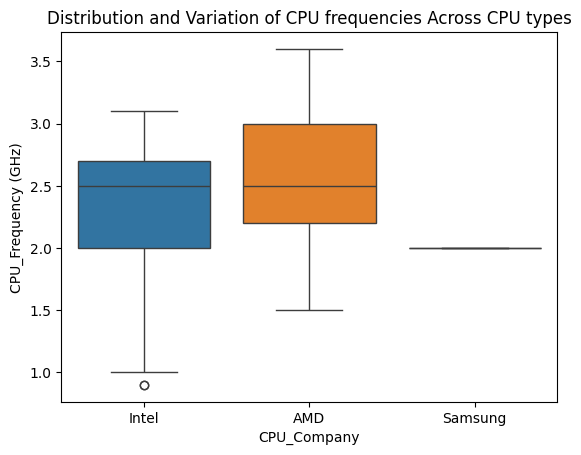

In [ ]:
plt.figure()
sns.boxplot(laptop_price_df, x='CPU_Company', y='CPU_Frequency (GHz)', hue="CPU_Company")
plt.title("Distribution and Variation of CPU frequencies Across CPU companies")

We can see that surprisingly AMD has the highest CPU frequencies although in the previous analysis we have seen that mose companies prefer using Intel's CPUs.
And not so surprisingly samsung compared to the other CPU companies has only a single CPU frequency (vs. a range that the other companies offer) and the lowest mean/median CPU frequency compared to intel and AMD, and that's probably why most companies prefer not to use their CPU.  